Exercise:

**5) 101<=Rollnumber<=125:**

#Task 1: Try the algo on Dataset3 - OneHotEncoding of features:and Train test Division 85%-15%

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [5]:
dataset = pd.read_csv(r"./PracticeDataSets/Dataset3.csv")
print("Number of examples and feature:", dataset.shape)
dataset

FileNotFoundError: [Errno 2] No such file or directory: './PracticeDataSets/Dataset3.csv'

In [ ]:
start = "\033[1m"
end = "\033[0;0m"

print(start + "Unique Outlook values: " + end, dataset['Outlook'].unique())

print(start + "\nUnique Temperature values: " + end, dataset['Temp'].unique())

print(start + "\nUnique Humidity values: " + end, dataset['Humidity'].unique())

print(start + "\nUnique Wind values: " + end, dataset['Wind'].unique())

print(start + "\nUnique Class values " + "\033[91m (Class Label): " + end, dataset['Class'].unique())

In [ ]:
pie_chart = dataset['Class'].value_counts().plot.pie(autopct = "%1.1f%%", radius = 2, startangle = 90)
pie_chart.set_ylabel('')
plt.show()

In [ ]:

dummy = pd.get_dummies(dataset.iloc[:,:-1])

cols = dataset.columns.tolist()
cols.remove("Class")

dataset = dataset.drop(cols, axis = 1)
dataset = pd.concat([dummy,dataset], axis = 1)

In [ ]:
print("\n\nFinal dataset :\n")
dataset.head()

In [ ]:
print("\nLabel\n\n")
labels = dataset['Class']
labels


In [ ]:
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(dataset.iloc[:,:-1],labels, test_size = 0.15, random_state = 107)
# set Random state of model equals to your roll number

In [ ]:
# creating intsance
gnb = GaussianNB()

# fitting the model or training
gnb.fit(data_train,target_train)

In [ ]:
# testing
target_predict = gnb.predict(data_test)

In [ ]:
# Accuracy
Accuracy = accuracy_score(target_test, target_predict)
print("Accuracy:", Accuracy)

In [ ]:

# Confusion Matrix
cm = confusion_matrix(target_test, target_predict)
print("Confusion Matrix:\n")
cm

In [ ]:
# Precision
precision = precision_score(target_test, target_predict, average=None)
print("Precision:\n")
precision

In [ ]:
# Recall
recall = recall_score(target_test, target_predict, average=None)
print("Recall:\n")
recall

#Task 2: Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 66%-34%

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # not used as data is already numerical
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn import metrics

In [6]:
wine = datasets.load_wine()
print("Number of examples and feature:", wine.data.shape)
dataset = pd.DataFrame(wine.data)

Number of examples and feature: (178, 13)


In [7]:
print("Features: ", wine.data)
print("Labels: ", np.unique(wine.target))


Features:  [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Labels:  [0 1 2]


In [8]:
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(wine.data,
                        wine.target, test_size = 0.34, random_state = 107)

In [9]:
#Create a Classifier
model=MultinomialNB()
# Train the model using the training sets
model.fit(data_train,target_train)

MultinomialNB()

In [10]:

target_pred = model.predict(data_test)

In [11]:
print("Accuracy:",accuracy_score(target_test, target_pred))

Accuracy: 0.8852459016393442


In [12]:
confusion_matrix(target_test, target_pred)

array([[19,  3,  0],
       [ 0, 23,  1],
       [ 0,  3, 12]])

Confusion matrix:
[[19  3  0]
 [ 0 23  1]
 [ 0  3 12]]


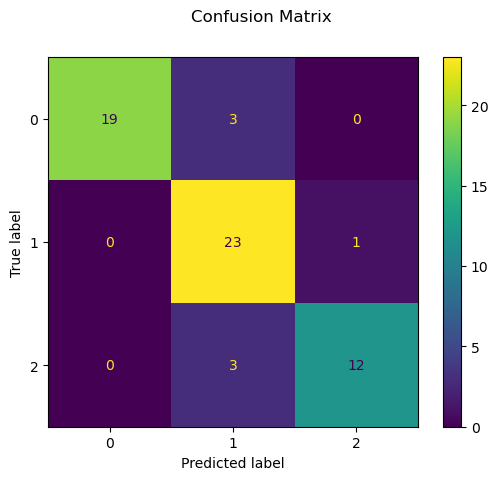

In [13]:
disp = metrics.plot_confusion_matrix(model, data_test, target_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()